In [7]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
model = ChatOpenAI()

In [5]:
# create  a state
class LLMState(TypedDict):
    question : str
    answer : str

def llm_qa(state:LLMState) -> LLMState:
    # extract the question from state
    question = state['question']

    # form a prompt
    prompt = f'answer thr following question \n{question}'

    # question to llm
    answer = model.invoke(prompt).content

    # update in state
    state['answer'] = answer

    return state

In [8]:
# define graph
graph = StateGraph(LLMState)

# add nodes
graph.add_node('QA_llm', llm_qa)

# add edges
graph.add_edge(START, 'QA_llm')
graph.add_edge('QA_llm', END)

# compile the graph
workflow = graph.compile()


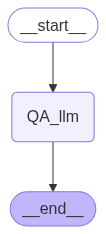

In [9]:
# Displaying the graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [10]:
# execute the graph
initial_state = {'question': 'What is the total centuaries of virat kohli in international cricket?'}

final_state = workflow.invoke(initial_state)

print(final_state)

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: API key *****here. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}